## 参考链接:
**matplotlib.axes 参考链接: [ax.annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html)**
**Python NetworkX 参考链接: [networkx tutorial](https://networkx.org/documentation/stable/tutorial.html)**
**Graph Visualization Tool: [Cytoscape](https://cytoscape.org/)**

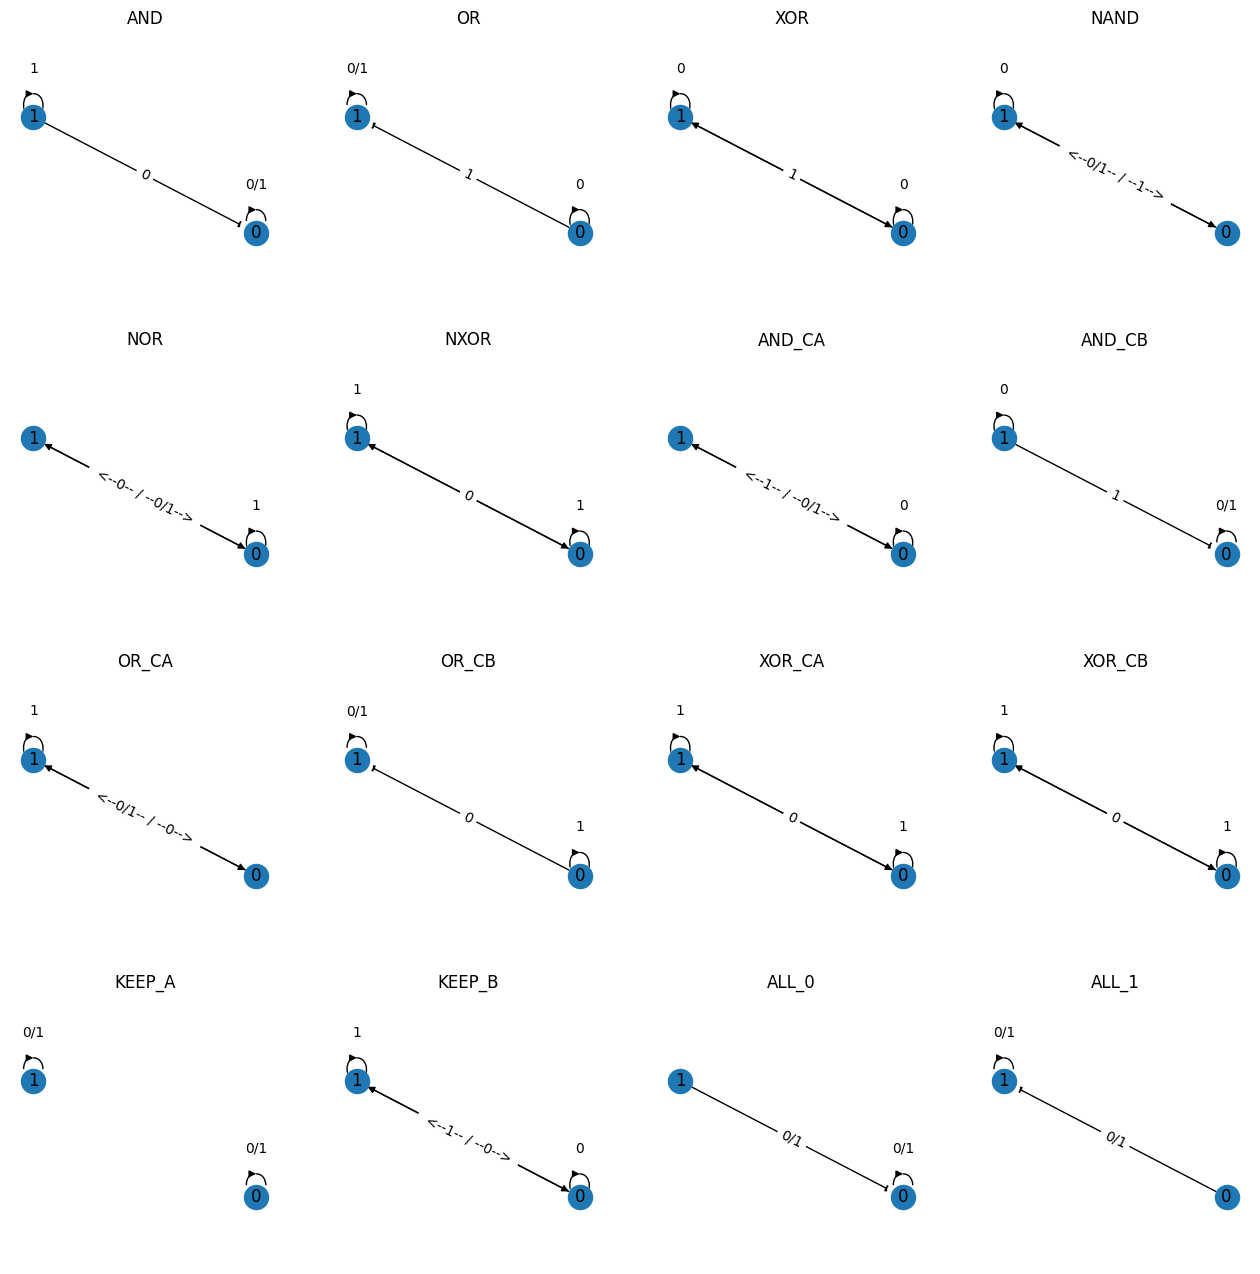

In [9]:
from collections import defaultdict

import matplotlib.pyplot as plt
import networkx as nx

bit_operations = [
    ('AND', lambda a, b: a & b),
    ('OR', lambda a, b: a | b),
    ('XOR', lambda a, b: a ^ b),
    ('NAND', lambda a, b: ~(a & b) & 1),
    ('NOR', lambda a, b: ~(a | b) & 1),
    ('NXOR', lambda a, b: ~(a ^ b) & 1),
    ('AND_CA', lambda a, b: (~a & b) & 1),
    ('AND_CB', lambda a, b: (a & ~b) & 1),
    ('OR_CA', lambda a, b: (~a | b) & 1),
    ('OR_CB', lambda a, b: (a | ~b) & 1),
    ('XOR_CA', lambda a, b: (~a ^ b) & 1),
    ('XOR_CB', lambda a, b: (a ^ ~b) & 1),
    ('KEEP_A', lambda a, b: a),
    ('KEEP_B', lambda a, b: b),
    ('ALL_0', lambda a, b: 0),
    ('ALL_1', lambda a, b: 1)
]


def draw_bit_operation_graph(operation, func, ax):
    def label_edges(weights, edges, pos, ax):
        """Attach a text label on top of each bar."""
        # d = defaultdict(list)
        # for u, v,
        for weight, (u, v) in zip(weights, edges):
            center = (pos[u] + pos[v]) / 2
            # print("center", center, u, v)
            ax.annotate(f'{weight}',
                        xy=(center[0], center[1]),
                        xytext=(0, 30),  # vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom')

    d = defaultdict(lambda: defaultdict(list))
    for a in [0, 1]:
        for b in [0, 1]:
            result = func(a, b)
            # # 添加节点和边
            d[a][result].append(b)

    # 合并重边
    edge_labels = dict()
    edges = []
    for u, data in d.items():
        for v, weights in data.items():
            edge_labels[(u, v)] = "/".join(map(str, weights))
            edges.append((u, v))

    # 双向有向边无法正常显示label, 做一些特殊处理
    biEdges = [(u, v) for (u, v), values in edge_labels.items() if u < v and (v, u) in edge_labels and edge_labels[(v, u)] != values]
    for u, v in biEdges:
        label = " <--{}-- / --{}--> ".format(edge_labels[(u, v)], edge_labels[(v, u)], )
        edge_labels[(u, v)] = label
        edge_labels.pop((v, u))

    # 创建有向图
    G = nx.DiGraph(edges)
    if len(G.nodes) <= 2:  # 在节点个数小于3时, 自环显示不出来
        G.add_edge('inf', 'inf', weight=0)
    pos = nx.circular_layout(G)

    # Draw graph nodes and edges
    nx.draw(G, pos, with_labels=True, ax=ax)
    # Add edge labels
    # edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)
    # Add self-loops to the remaining nodes
    edgelist = [(n, n) for n in G.nodes() if n in G.successors(n) if n != 'inf']
    weights = [edge_labels[edge] for edge in edgelist]
    label_edges(weights, edgelist, pos, ax=ax)

    # show title
    ax.set_title(operation)
    # 设置 y 轴的范围
    ax.set_ylim(-0.5, 1.5)
    ax.axis('off')


fig, axes = plt.subplots(4, 4, figsize=(16, 16))
for (operation, func), ax in zip(bit_operations, axes.flatten()):
    draw_bit_operation_graph(operation, func, ax)

# for operation, func in bit_operations[:1]:
# for operation, func in bit_operations:
#     plt.figure()
#     ax = plt.gca()
#     draw_bit_operation_graph(operation, func, ax)

plt.show()
